In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

from datetime import datetime

In [2]:
foodOrigins = ["Failed Experiment", "Leftovers", "Expired food", "not sure"]

Cooking = ["raw", "raw (probably still alive)", "burnt", "insanely burnt", "calcinated", "Probably radioactive"]

Spiciness = [0, 1, 2, 3]


# ALGORITHME DE RECOMMANDATION

In [3]:
#from recommendation import recommend_by_influence as rif
#from recommendation import recommend_by_number_of_common_friends as rcf
#from recommendation import number_of_common_friends_ratio_map

CHARACTERS = [
    "Nurse",
    "Juliet",
    "Capulet",
    "Tybalt",
    "Friar Laurence",
    "Romeo",
    "Benvolio",
    "Montague",
    "Escalus",
    "Mercutio",
    "Paris"
]

RELATIONSHIPS = [
    ("Nurse", "Juliet"),
    ("Juliet", "Tybalt"),
    ("Juliet", "Friar Laurence"),
    ("Juliet", "Romeo"),
    ("Juliet", "Capulet"),
    ("Capulet", "Tybalt"),
    ("Capulet", "Escalus"),
    ("Capulet", "Paris"),
    ("Romeo", "Friar Laurence"),
    ("Romeo", "Benvolio"),
    ("Romeo", "Montague"),
    ("Romeo", "Mercutio"),
    ("Benvolio", "Montague"),
    ("Montague", "Escalus"),
    ("Escalus", "Mercutio"),
    ("Escalus", "Paris"),
    ("Mercutio", "Paris"),
]


MODALITIES = [
    "Failed Experiment", "Leftovers", "Expired food", "not sure",
    "raw", "raw (probably still alive)", "burnt", "insanely burnt", "calcinated", "Probably radioactive",
    "0", "1", "2", "3"
]


INTERESTS = [
    ("Nurse", "Failed Experiment"),
    ("Nurse", "raw"),
    ("Nurse", "2"),
    ("Juliet", "Leftovers"),
    ("Juliet", "insanely burnt"),
    ("Juliet", "0"),
    ("Capulet", "Expired food"),
    ("Capulet", "Probably radioactive"),
    ("Capulet", "1"),
    ("Tybalt", "not sure"),
    ("Tybalt", "raw (probably still alive)"),
    ("Tybalt", "3"),
    ("Friar Laurence", "Failed Experiment"),
    ("Friar Laurence", "insanely burnt"),
    ("Friar Laurence", "0"),
    ("Romeo", "Leftovers"),
    ("Romeo", "raw"),
    ("Romeo", "3"),
    ("Benvolio", "Expired food"),
    ("Benvolio", "burnt"),
    ("Benvolio", "1"),
    ("Montague", "Failed Experiment"),
    ("Montague", "calcinated"),
    ("Montague", "2"),
    ("Escalus", "Leftovers"),
    ("Escalus", "Probably radioactive"),
    ("Escalus", "1"),
    ("Mercutio", "Failed Experiment"),
    ("Mercutio", "raw (probably still alive)"),
    ("Mercutio", "2"),
    ("Paris", "not sure"),
    ("Paris", "insanely burnt"),
    ("Paris", "3")
]


In [4]:
#Relationship Graph
rj_graph = nx.Graph()
rj_graph.add_nodes_from(CHARACTERS)
rj_graph.add_edges_from(RELATIONSHIPS)

#Interest Graph
i_graph = nx.Graph()
i_graph.add_nodes_from(CHARACTERS)
i_graph.add_edges_from(INTERESTS)

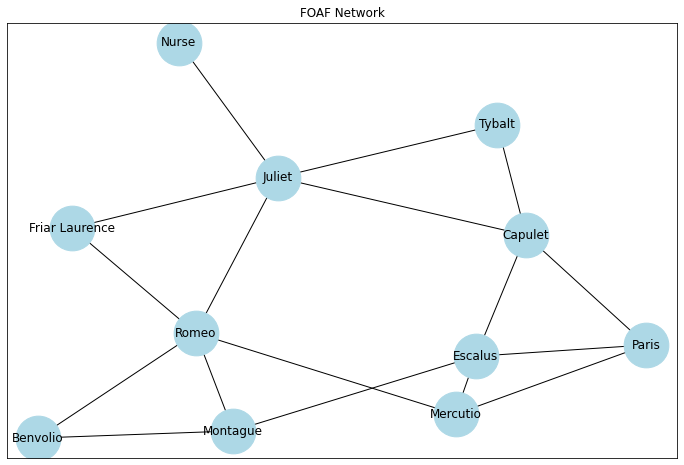

In [5]:
pos = nx.spring_layout(rj_graph)
plt.figure(figsize=(12, 8))  # Set the figure size
nx.draw_networkx_nodes(rj_graph, pos, nodelist=CHARACTERS, node_color='lightblue', node_size=2000)
nx.draw_networkx_edges(rj_graph, pos)
nx.draw_networkx_labels(rj_graph, pos)
plt.title("FOAF Network")
plt.show()

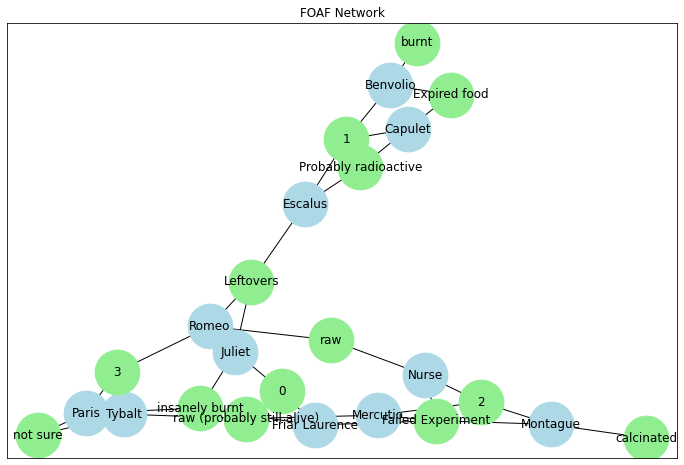

In [6]:
pos = nx.spring_layout(i_graph)
plt.figure(figsize=(12, 8))  # Set the figure size
nx.draw_networkx_nodes(i_graph, pos, nodelist=CHARACTERS, node_color='lightblue', node_size=2000)
nx.draw_networkx_nodes(i_graph, pos, nodelist=MODALITIES, node_color='lightgreen', node_size=2000)
nx.draw_networkx_edges(i_graph, pos)
nx.draw_networkx_labels(i_graph, pos)
plt.title("FOAF Network")
plt.show()

In [36]:
from recommendation import recommend_by_influence as rif
from recommendation import recommend_by_number_of_common_friends as rcf
from recommendation import recommend_by_common_friends_interest as rfi

from recommendation import number_of_common_friends_map # number of common friends
from recommendation import number_of_common_interest_map # number of common interest


def friends_recommandation_algorithm(graph, interest_graph, user):
    """Return the final list of recommanded user based on the mean result of 
    - The rif algorithm.
    - The rcf algorithm.
    - The rfi algorithm.
    The function also returns the number of common friend and the number of
    common interest shared with the recommanded users
    """
    
    rcf_map = number_of_common_friends_map(graph, user)
    rfi_map = number_of_common_interest_map(graph, interest_graph, user)
    
    rcf_result = rcf(graph, user) # nb like de toi
    rif_result = rif(graph, user) # nb like tout court
    rfi_result = rfi(graph, interest_graph, user) # nbinteret 
    
    print("RCF results")
    print(rcf_result)
    print("RIF results")
    print(rif_result)
    print("RFI results")
    print(rfi_result)
    
    all_result = [rcf_result, rif_result, rfi_result]
    
    moyennes = {x: sum(i for l in all_result for i, y in enumerate(l) if y == x) / len(all_result) for x in set().union(*all_result)}
    
    print()
    print("Merged Results")
    
    return sorted(moyennes, key=moyennes.get), rcf_map, rfi_map
    
    
    

In [37]:
friends_recommandation_algorithm(rj_graph, i_graph, "Romeo")

RCF results
['Nurse', 'Escalus', 'Tybalt', 'Paris', 'Capulet']
RIF results
['Escalus', 'Paris', 'Capulet', 'Nurse', 'Tybalt']
RFI results
['Escalus', 'Nurse', 'Paris', 'Tybalt', 'Capulet']

Merged Results


(['Escalus', 'Nurse', 'Paris', 'Tybalt', 'Capulet'],
 {'Capulet': 1, 'Tybalt': 1, 'Paris': 1, 'Escalus': 2, 'Nurse': 1},
 {'Capulet': 1, 'Tybalt': 2, 'Paris': 2, 'Escalus': 2, 'Nurse': 2})

## Fin de l'algorithme

### Début de l'algorithme de recommandation des posts

In [9]:

POSTS = [
    "P1",
    "P2",
    "P3",
    "P4",
    "P5",
    "P6",
    "P7",
    "P8",
    "P9",
    "P10",
    "P11",
    "P12",
    "P13",
    "P14",
    "P15",
    "P16",
    "P17",
    "P18",
    "P19",
    "P20",
    "P21",
    "P22",
    "P23",
    "P24"
]


POSTS_USER = [
    ("Nurse", "P1"),
    ("Nurse", "P2"),
    ("Juliet", "P3"),
    ("Juliet", "P4"),
    ("Juliet", "P5"),
    ("Capulet", "P6"),
    ("Tybalt", "P7"),
    ("Tybalt", "P8"),
    ("Tybalt", "P9"),
    ("Friar Laurence", "P10"),
    ("Friar Laurence", "P11"),
    ("Friar Laurence", "P12"),
    ("Romeo", "P13"),
    ("Romeo", "P14"),
    ("Benvolio", "P15"),
    ("Montague", "P16"),
    ("Montague", "P17"),
    ("Escalus", "P18"),
    ("Mercutio", "P19"),
    ("Mercutio", "P20"),
    ("Paris", "P21"),
    ("Paris", "P22"),
    ("Paris", "P23"),
    ("Paris", "P24"),
]

POST_LIKES = [
    ("Nurse", "P8"),
    ("Juliet", "P13"),
    ("Juliet", "P14"),
    ("Capulet", "P5"),
    ("Tybalt", "P7"),
    ("Friar Laurence", "P2"),
    ("Romeo", "P11"),
    ("Benvolio", "P3"),
    ("Montague", "P1"),
    ("Escalus", "P4"),
    ("Mercutio", "P10"),
    ("Paris", "P12"),
    ("Nurse", "P15"),
    ("Juliet", "P6"),
    ("Capulet", "P16"),
    ("Tybalt", "P17"),
    ("Friar Laurence", "P18"),
    ("Romeo", "P19"),
    ("Benvolio", "P20"),
    ("Montague", "P21"),
    ("Escalus", "P22"),
    ("Mercutio", "P23"),
    ("Paris", "P24"),
    ("Nurse", "P13"),
    ("Juliet", "P14"),
    ("Capulet", "P11"),
    ("Tybalt", "P5"),
    ("Friar Laurence", "P7"),
    ("Romeo", "P9"),
    ("Benvolio", "P3"),
    ("Montague", "P2"),
    ("Escalus", "P18"),
    ("Mercutio", "P4"),
    ("Paris", "P6"),
    ("Nurse", "P19"),
    ("Juliet", "P10"),
    ("Capulet", "P12"),
    ("Tybalt", "P15"),
    ("Friar Laurence", "P17"),
    ("Romeo", "P1"),
    ("Benvolio", "P8"),
    ("Montague", "P20"),
    ("Escalus", "P22"),
    ("Mercutio", "P23"),
    ("Paris", "P24"),
    ("Nurse", "P7"),
    ("Juliet", "P14"),
    ("Capulet", "P16"),
    ("Tybalt", "P13"),
    ("Friar Laurence", "P9"),
]

POST_LIKES_COUNT = {
    "P1": 5,
    "P2": 3,
    "P3": 7,
    "P4": 2,
    "P5": 8,
    "P6": 4,
    "P7": 6,
    "P8": 9,
    "P9": 1,
    "P10": 5,
    "P11": 7,
    "P12": 3,
    "P13": 6,
    "P14": 4,
    "P15": 8,
    "P16": 2,
    "P17": 9,
    "P18": 5,
    "P19": 7,
    "P20": 3,
    "P21": 6,
    "P22": 4,
    "P23": 8,
    "P24": 2,
}


POSTS_CATEGORIES = [
    ("P1", "Leftovers"),
    ("P1", "raw"),
    ("P1", "2"),
    ("P2", "Failed Experiment"),
    ("P2", "burnt"),
    ("P2", "3"),
    ("P3", "Expired food"),
    ("P3", "calcinated"),
    ("P3", "1"),
    ("P4", "not sure"),
    ("P4", "raw (probably still alive)"),
    ("P4", "0"),
    ("P5", "Leftovers"),
    ("P5", "insanely burnt"),
    ("P5", "3"),
    ("P6", "Failed Experiment"),
    ("P6", "Probably radioactive"),
    ("P6", "1"),
    ("P7", "Expired food"),
    ("P7", "raw"),
    ("P7", "2"),
    ("P8", "not sure"),
    ("P8", "burnt"),
    ("P8", "0"),
    ("P9", "Leftovers"),
    ("P9", "calcinated"),
    ("P9", "3"),
    ("P10", "Failed Experiment"),
    ("P10", "raw (probably still alive)"),
    ("P10", "2"),
    ("P11", "Expired food"),
    ("P11", "insanely burnt"),
    ("P11", "1"),
    ("P12", "not sure"),
    ("P12", "Probably radioactive"),
    ("P12", "0"),
    ("P13", "Leftovers"),
    ("P13", "raw"),
    ("P13", "3"),
    ("P14", "Failed Experiment"),
    ("P14", "burnt"),
    ("P14", "2"),
    ("P15", "Expired food"),
    ("P15", "calcinated"),
    ("P15", "1"),
    ("P16", "not sure"),
    ("P16", "raw (probably still alive)"),
    ("P16", "0"),
    ("P17", "Leftovers"),
    ("P17", "insanely burnt"),
    ("P17", "3"),
    ("P18", "Failed Experiment"),
    ("P18", "Probably radioactive"),
    ("P18", "1"),
    ("P19", "Expired food"),
    ("P19", "raw"),
    ("P19", "2"),
    ("P20", "not sure"),
    ("P20", "burnt"),
    ("P20", "0"),
    ("P21", "Leftovers"),
    ("P21", "calcinated"),
    ("P21", "3"),
    ("P22", "Failed Experiment"),
    ("P22", "raw (probably still alive)"),
    ("P22", "2"),
    ("P23", "Expired food"),
    ("P23", "insanely burnt"),
    ("P23", "1"),
    ("P24", "not sure"),
    ("P24", "Probably radioactive"),
    ("P24", "0"),
]



POSTS_DATES = [
    ("P1", "2023-05-01 10:00:00"),
    ("P2", "2023-05-02 11:30:00"),
    ("P3", "2023-05-03 14:00:00"),
    ("P4", "2023-05-04 09:15:00"),
    ("P5", "2023-05-05 16:45:00"),
    ("P6", "2023-05-06 12:00:00"),
    ("P7", "2023-05-07 08:30:00"),
    ("P8", "2023-05-08 17:00:00"),
    ("P9", "2023-05-09 19:00:00"),
    ("P10", "2023-05-10 07:00:00"),
    ("P11", "2023-05-11 13:30:00"),
    ("P12", "2023-05-12 15:00:00"),
    ("P13", "2023-05-13 18:45:00"),
    ("P14", "2023-05-14 10:00:00"),
    ("P15", "2023-05-15 11:30:00"),
    ("P16", "2023-05-16 14:00:00"),
    ("P17", "2023-05-17 09:15:00"),
    ("P18", "2023-05-18 16:45:00"),
    ("P19", "2023-05-19 12:00:00"),
    ("P20", "2023-05-20 08:30:00"),
    ("P21", "2023-05-21 17:00:00"),
    ("P22", "2023-05-22 19:00:00"),
    ("P23", "2023-05-23 07:00:00"),
    ("P24", "2023-05-24 13:30:00"),
]


In [10]:
def calculate_hours_since_post(posts_dates):
    current_time = datetime.now()
    hours_since_post = {}
    
    for post_id, post_date in posts_dates:
        post_datetime = datetime.strptime(post_date, "%Y-%m-%d %H:%M:%S")
        delta = current_time - post_datetime
        hours_since_post[post_id] = delta.total_seconds() // 3600  # Convert seconds to hours
    
    return hours_since_post

In [11]:
calculate_hours_since_post(POSTS_DATES)

{'P1': 9360.0,
 'P2': 9334.0,
 'P3': 9308.0,
 'P4': 9289.0,
 'P5': 9257.0,
 'P6': 9238.0,
 'P7': 9217.0,
 'P8': 9185.0,
 'P9': 9159.0,
 'P10': 9147.0,
 'P11': 9116.0,
 'P12': 9091.0,
 'P13': 9063.0,
 'P14': 9048.0,
 'P15': 9022.0,
 'P16': 8996.0,
 'P17': 8977.0,
 'P18': 8945.0,
 'P19': 8926.0,
 'P20': 8905.0,
 'P21': 8873.0,
 'P22': 8847.0,
 'P23': 8835.0,
 'P24': 8804.0}

In [12]:
from recommendation import recommend_by_number_of_like_per_user_posts as rlp
from recommendation import recommend_by_number_of_like as rnl
from recommendation import recommend_by_common_interest_with_post as rip
from recommendation import recommend_by_publication_date as rpd


In [13]:
#User Post Graph
up_graph = nx.Graph()
up_graph.add_nodes_from(CHARACTERS)
up_graph.add_edges_from(POSTS_USER)

#User Like Post Graph
lp_graph = nx.Graph()
lp_graph.add_nodes_from(CHARACTERS)
lp_graph.add_edges_from(POST_LIKES)

#Post category Graph
pc_graph = nx.Graph()
pc_graph.add_nodes_from(MODALITIES)
pc_graph.add_edges_from(POSTS_CATEGORIES)

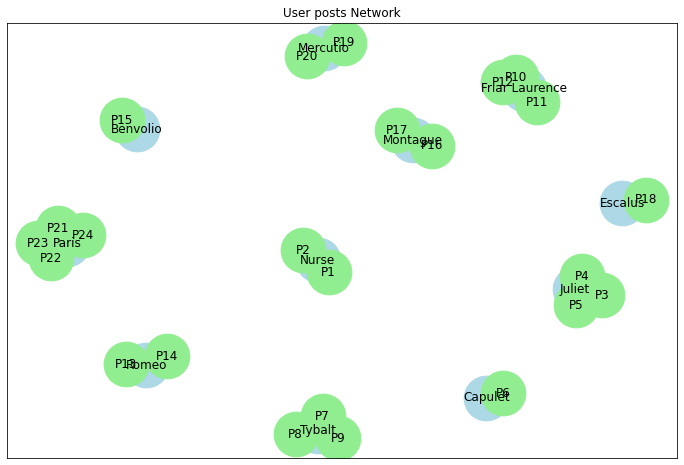

In [14]:
pos = nx.spring_layout(up_graph)
plt.figure(figsize=(12, 8))  # Set the figure size
nx.draw_networkx_nodes(up_graph, pos, nodelist=CHARACTERS, node_color='lightblue', node_size=2000)
nx.draw_networkx_nodes(up_graph, pos, nodelist=POSTS, node_color='lightgreen', node_size=2000)
nx.draw_networkx_edges(up_graph, pos)
nx.draw_networkx_labels(up_graph, pos)
plt.title("User posts Network")
plt.show()

In [15]:
set(up_graph.neighbors("Romeo"))

{'P13', 'P14'}

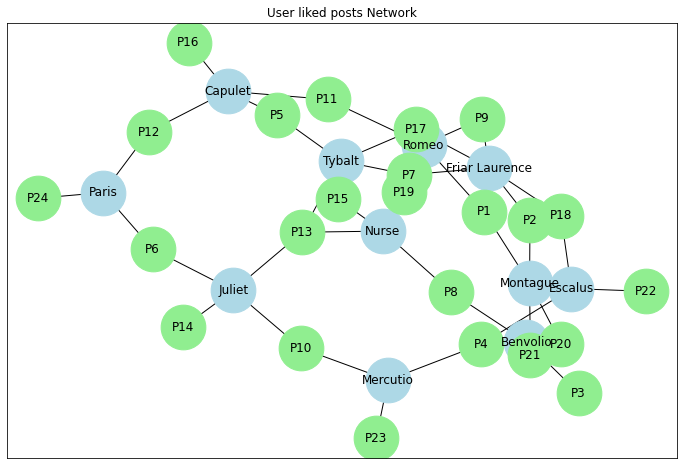

In [16]:
pos = nx.spring_layout(lp_graph)
plt.figure(figsize=(12, 8))  # Set the figure size
nx.draw_networkx_nodes(lp_graph, pos, nodelist=CHARACTERS, node_color='lightblue', node_size=2000)
nx.draw_networkx_nodes(lp_graph, pos, nodelist=POSTS, node_color='lightgreen', node_size=2000)
nx.draw_networkx_edges(lp_graph, pos)
nx.draw_networkx_labels(lp_graph, pos)
plt.title("User liked posts Network")
plt.show()

In [17]:
testiu = set(lp_graph.neighbors("Romeo"))
testiu.update(set(lp_graph.neighbors("Paris")))
testiu

{'P1', 'P11', 'P12', 'P19', 'P24', 'P6', 'P9'}

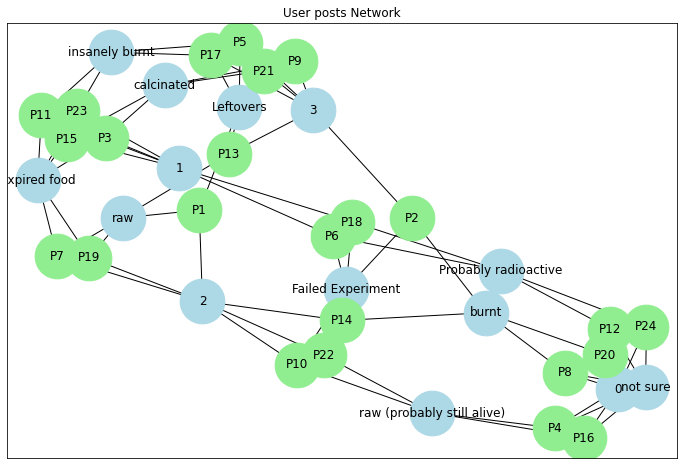

In [18]:
pos = nx.spring_layout(pc_graph)
plt.figure(figsize=(12, 8))  # Set the figure size
nx.draw_networkx_nodes(pc_graph, pos, nodelist=MODALITIES, node_color='lightblue', node_size=2000)
nx.draw_networkx_nodes(pc_graph, pos, nodelist=POSTS, node_color='lightgreen', node_size=2000)
nx.draw_networkx_edges(pc_graph, pos)
nx.draw_networkx_labels(pc_graph, pos)
plt.title("User posts Network")
plt.show()

## Le fameux algo

In [40]:

def posts_recommandation_algorithm(graph, interest_graph, user_post_graph, like_post_graph, post_category_graph,post_likes_count, posts_date, user):
    """Return the final list of recommanded user based on the mean result of 
    - The rlp algorithm. (recommend_by_number_of_like_per_user_posts)
    - The rnl algorithm. (recommend_by_number_of_like)
    - The rip algorithm. (recommend_by_common_interest_with_post)
    - The rpd algorithm. (recommend_by_publication_date)
    The function also returns the number of common friend and the number of
    common interest shared with the recommanded users
    """

    
    rlp_result = rlp(graph,user_post_graph,like_post_graph, user) # nb like de toi
    rnl_result = rnl(graph, user_post_graph, post_likes_count, user) 
    rip_result = rip(graph, interest_graph, user_post_graph, post_category_graph, user) 
    
    print("RLP results")
    print(rlp_result)
    print("RNL results")
    print(rnl_result)
    print("RIP results")
    print(rip_result)
    
    
    print()
    first_step_posts = [rlp_result, rnl_result, rip_result]
    
    #Mean of the first 3 lists
    first_step_ranking = {x: sum(i for l in first_step_posts for i, y in enumerate(l) if y == x) / len(first_step_posts) for x in set().union(*first_step_posts)}
    first_ranking = sorted(first_step_ranking, key=first_step_ranking.get)
    print("first Merge Ranking results")
    print(first_ranking)
    
    #Date ranking list
    rpd_result = rpd(graph, user_post_graph, calculate_hours_since_post( posts_date), user) 
    print("RPD results")
    print(rpd_result)
    
    final_step_posts = [first_ranking, rpd_result]
    
    #Final Mean of the 2 lists
    final_step_ranking = {x: sum(i for l in final_step_posts for i, y in enumerate(l) if y == x) / len(final_step_posts) for x in set().union(*final_step_posts)}
    final_ranking = sorted(final_step_ranking, key=final_step_ranking.get)

    print("final Merge Ranking results")
    print(final_ranking)
    
    return final_ranking
    
    
    

In [42]:
posts_recommandation_algorithm(rj_graph, i_graph, up_graph, lp_graph, pc_graph,POST_LIKES_COUNT, POSTS_DATES, "Romeo")

RLP results
['P10', 'P11', 'P12', 'P19', 'P20', 'P15', 'P16', 'P17', 'P3', 'P4', 'P5']
RNL results
['P17', 'P15', 'P5', 'P11', 'P19', 'P3', 'P10', 'P12', 'P20', 'P16', 'P4']
RIP results
['P17', 'P5', 'P19', 'P10', 'P11', 'P12', 'P15', 'P16', 'P20', 'P3', 'P4']

first Merge Ranking results
['P17', 'P11', 'P10', 'P19', 'P15', 'P5', 'P12', 'P20', 'P3', 'P16', 'P4']
RPD results
['P20', 'P19', 'P17', 'P16', 'P15', 'P12', 'P11', 'P10', 'P5', 'P4', 'P3']
final Merge Ranking results
['P17', 'P19', 'P20', 'P11', 'P15', 'P10', 'P12', 'P16', 'P5', 'P3', 'P4']


['P17', 'P19', 'P20', 'P11', 'P15', 'P10', 'P12', 'P16', 'P5', 'P3', 'P4']

## Bonus, les amis d'amis

In [ ]:
def posts_foaf_recommandation_algorithm(graph, interest_graph, user_post_graph, like_post_graph, post_category_graph,post_likes_count, posts_date, user):

### Fin de l'algorithme de recommandation de post

In [ ]:
ALGORITHMS = ["recommend_by_number_of_common_friends", "recommend_by_influence"]


def algorithm_difference(graph, nodes, results_filename):
    """Identify if the algorithm results are different."""
    same = 0
    different = 0

    #rcfValues = rcf(graph, node)    

    with open(results_filename, "w") as file:
        for node in nodes:
            print(node)
            #print(rif(graph, node))
            #print(number_of_common_friends_map(graph, node))
            #print(rcf(graph, node))
            print(number_of_common_friends_map(graph, node))
            #print(influence_map(graph, node))

            if rcf(graph, node) == rif(graph, node):
                same += 1
                file.write("Same\n")
            else:
                different += 1
                file.write("Different\n")
        

        file.write("\n")
        file.write(f"Same: {same}\n")
        file.write(f"Different: {different}\n")


def average_ranking(user1, user2, user1_recommendations, user2_recommendations):
    """Return the average ranking of two users from their recommendations."""

    if user1 in user2_recommendations and user2 in user1_recommendations:
        user1_rank = user2_recommendations.index(user1) + 1
        user2_rank = user1_recommendations.index(user2) + 1
        return (user1_rank + user2_rank) / 2

    return None


def get_user_recommendations(graph, user, algorithm):
    """Return user recommendations based on algorithm."""

    if algorithm == ALGORITHMS[0]:
        return rcf(graph, user)

    return rif(graph, user)


def algorithms_average(graph, user1, user2):
    """Return recommendation algorithm average scores."""

    common_average = 0
    influence_average = 0
    for algorithm in ALGORITHMS:
        user1_recommendations = get_user_recommendations(graph, user1, algorithm)
        user2_recommendations = get_user_recommendations(graph, user2, algorithm)

        average = average_ranking(
            user1, user2, user1_recommendations, user2_recommendations
        )
        #print(user1)
        #print(user2)
        #print(user1_recommendations)
        #print(user2_recommendations)
        #print(average)
        if average is None:
            return None

        if algorithm == ALGORITHMS[0]:
            common_average = average
        else:
            influence_average = average

    return {ALGORITHMS[0]: common_average, ALGORITHMS[1]: influence_average}


def compare_algorithms(graph, edges):
    """Compare algorithms and return the better one with average performace for each."""

    edge = random.choice(edges)
    
    user1 = edge[0]
    user2 = edge[1]
    graph.remove_edge(user1, user2)

    average_results = algorithms_average(graph, user1, user2)
    graph.add_edge(user1, user2)

    better_algorithm = None
    if not average_results:
        return better_algorithm

    common_friends_average = average_results["recommend_by_number_of_common_friends"]
    influence_average = average_results["recommend_by_influence"]

    if common_friends_average < influence_average:
        better_algorithm = ALGORITHMS[0]

    if influence_average < common_friends_average:
        better_algorithm = ALGORITHMS[1]

    return {
        "better_algorithm": better_algorithm,
        "common_friends_average": common_friends_average,
        "influence_average": influence_average,
    }


def algorithm_analysis(graph, edges, results_filename):
    """Generate a report on the results of both algorithms."""
    common_friends_algorithm = 0
    influence_algorithm = 0
    neither_algorithm = 0

    with open(results_filename, "w") as file:
        for _ in range(1, 101):
            result = compare_algorithms(graph, edges)
            if result is None:
                neither_algorithm += 1
                continue

            file.write(
                f"Average rank common friends algorithm: {result['common_friends_average']}\n"
            )
            file.write(
                f"Average rank influence algorithm: {result['influence_average']}\n"
            )

            if result["better_algorithm"] == ALGORITHMS[0]:
                common_friends_algorithm += 1
                file.write(f"Number of common friends algorithm is better\n")
            if result["better_algorithm"] == ALGORITHMS[1]:
                influence_algorithm += 1
                file.write(f"Influence algorithm is better\n")
            if result["better_algorithm"] is None:
                neither_algorithm += 1
                file.write(f"None is better\n")
            file.write("\n")

        file.write(f"Number of common friends algorithm: {common_friends_algorithm}\n")
        file.write(f"Influence algorithm: {influence_algorithm}\n")
        file.write(f"Neutral: {neither_algorithm}\n")


if __name__ == "__main__":
    rj_graph = nx.Graph()
    rj_graph.add_nodes_from(CHARACTERS)
    rj_graph.add_edges_from(RELATIONSHIPS)

    algorithm_difference(rj_graph, CHARACTERS, "results/rj_algorithm_diff.txt")
    algorithm_analysis(rj_graph, RELATIONSHIPS, "results/rj_algorithm_analysis.txt")

In [ ]:
# Tests
import unittest

from recommendation import (
    common_friends,
    friends,
    friends_of_friends,
    influence_map,
    number_map_to_sorted_list,
    number_of_common_friends_map,
    recommend_by_influence,
    recommend_by_number_of_common_friends as rcf,
)

NODES = ["A", "B", "C", "D", "E", "F", "G"]

EDGES = [
    ("A", "B"),
    ("A", "G"),
    ("B", "C"),
    ("C", "D"),
    ("C", "E"),
    ("E", "D"),
    ("E", "F"),
    ("E", "G"),
]


class BaseTestCase(unittest.TestCase):
    def setUp(self):
        self.graph = nx.Graph()
        self.graph.add_nodes_from(NODES)
        self.graph.add_edges_from(EDGES)

    def test_common_friends_map(self):
        """Test if the correct common friends map is returned"""
        test_data = [
            {"input": "A", "output": {"C": 1, "E": 1}},
            {"input": "B", "output": {"D": 1, "G": 1, "E": 1}},
            {"input": "C", "output": {"G": 1, "F": 1, "A": 1}},
            {"input": "D", "output": {"G": 1, "F": 1, "B": 1}},
            {"input": "E", "output": {"A": 1, "B": 1}},
        ]
        for data in test_data:
            result = number_of_common_friends_map(self.graph, data["input"])
            self.assertEqual(result, data["output"])

    def test_common_friends(self):
        """ "Test if function returns correct common friends"""
        # Because the possible pairs out of the graph are many I will only test 3
        test_data = [
            {"input": ["B", "E"], "output": {"C"}},
            {"input": ["B", "G"], "output": {"A"}},
            {"input": ["D", "F"], "output": {"E"}},
        ]
        for data in test_data:
            result = common_friends(self.graph, *data["input"])
            self.assertEqual(result, data["output"])

    def test_friends_of_friends(self):
        """ "Test if the correct friends of friends are returned"""
        test_data = [
            {"input": "A", "output": {"C", "E"}},
            {"input": "B", "output": {"D", "E", "G"}},
            {"input": "C", "output": {"A", "G", "F"}},
            {"input": "D", "output": {"B", "G", "F"}},
            {"input": "E", "output": {"A", "B"}},
            {"input": "F", "output": {"C", "D", "G"}},
        ]
        for data in test_data:
            result = friends_of_friends(self.graph, data["input"])
            self.assertEqual(result, data["output"])

    def test_friends(self):
        """Test whether the friends function returns the correct output"""
        test_data = [
            {"input": "A", "output": {"B", "G"}},
            {"input": "B", "output": {"A", "C"}},
            {"input": "C", "output": {"B", "D", "E"}},
            {"input": "D", "output": {"C", "E"}},
            {"input": "E", "output": {"G", "F", "C", "D"}},
            {"input": "F", "output": {"E"}},
        ]
        for data in test_data:
            result = friends(self.graph, data["input"])
            self.assertEqual(result, data["output"])

    def test_influence_map(self):
        """ "Test influence map function is returning correct results"""
        self.assertEqual(influence_map(self.graph, "A"), {"E": 0.5, "C": 0.5})
        self.assertEqual(
            influence_map(self.graph, "B"), {"G": 0.5, "E": 1 / 3, "D": 1 / 3}
        )

    def test_influence_recommendation(self):
        """ "Test influence recommendation"""
        self.assertEqual(recommend_by_influence(self.graph, "A"), ["C", "E"])
        self.assertEqual(recommend_by_influence(self.graph, "B"), ["G", "D", "E"])

    def test_sort_map_to_list(self):
        """Test that the function sorts a dictionary and returns a list"""
        self.assertEqual(number_map_to_sorted_list({"A": 2, "H": 3}), ["H", "A"])

    def test_common_friend_recommendation(self):
        """Test common friend recommendation"""
        self.assertEqual(rcf(self.graph, "A"), ["C", "E"])
        self.assertEqual(rcf(self.graph, "E"), ["A", "B"])

In [ ]:
np.round(2.345556, 1)